# Introduction

This assessment aims to evaluate your understanding and application of the concepts covered in the Data Analytics course. You will be tasked with analyzing a dataset related to remote work and mental health, utilizing various data manipulation, statistical analysis, and visualization techniques learned throughout the course. This exercise will help reinforce your skills in data handling, exploratory analysis, and drawing meaningful insights from data.

### Submission Details:

The deadline for submission is 16 November at 11:59 PM. Specific submission details will be shared with you shortly.

### Passing Criteria:

To successfully pass this assessment, you must achieve a score of 80% or higher.
We encourage you to engage with the material and demonstrate your analytical skills. Good luck!


---



# Section 1 - Beginner (25%)


## Shopping Cart System with Discounts

Write a Python program to simulate a shopping cart system for an online store. The program will calculate the total cost of items, apply discounts, and check if the total exceeds a specified budget.

1.	Variables and Lists:
  - Define a `budget` variable with an initial value of 200.
  
  - Create two empty lists called `item_names_list` and `item_prices_list` to store the name and price of each item separately.

In [1]:
budget = 200    # variable defined
# empty lists
item_names = []
item_prices = []

2. Functions:
  - Write a function `add_item_to_cart(item_name, item_price)` that takes the item’s name and price as arguments, appends the name to item_names and the price to item_prices, and returns both updated lists.
  
  - Write a function `calculate_total(item_prices)` that calculates and returns the total cost of all items in item_prices.

    Conditions:
    - If the total cost exceeds the budget after adding an item, print "Budget exceeded!" and stop adding more items. **Note: I have moved this functionality to the main method.**
    - If the total cost is within budget and exceeds $100, apply a 10% discount on the total and print the discounted total.

In [2]:
# function to append to lists and return them
def add_item_to_cart(item_name, item_price):
  item_names.append(item_name)
  item_prices.append(item_price)
  return item_names, item_prices

discount = False;
# function to calculate the total cost
def calculate_total(item_prices):
  for item in item_prices:
    total = sum(item_prices)
  if total > 100:
    discount = True
    total = total * 0.9
  return total

3.	Loop and Input:
  - Start the input only once the user says 'start'
  - Use a loop to allow the user to add items to the cart by entering an item name and price. The loop should stop when the user types 'done'.
  - For each item, add it to item_names and item_prices using add_item_to_cart, then update the total cost using calculate_total.

Output:
  - After the loop ends, display the final cart with each item and its price, the initial total, any applicable discount, and the final total.


In [3]:
user = input("Enter 'start' to start: ")

# when not valid
while user != "start":
  print("Invalid input, try again")
  user = input("Enter 'start' to start: ")

# when started
if user == "start":
  # make sure lists empty
  item_names.clear()
  item_prices.clear()
  item_name = input("Enter item name or 'done': ")

  while item_name != "done":
    item_price = float(input("Enter item price: $"))
    add_item_to_cart(item_name, item_price)
    # total update and budget check
    if calculate_total(item_prices) > budget:
      item_prices.pop()
      item_names.pop()
      print("Budget exceeded!")
      break
    item_name = input("Enter item name or 'done': ")

  print("\nFinal cart:")
  # print all items bought
  for i in range(len(item_names)):
    print(f"{item_names[i]} ${item_prices[i]:.2f}")

  print(f"Initial total: ${sum(item_prices):.2f}")
  # check for discount
  if discount:
    print("Discount applied: 10%")
  print(f"Final total: ${calculate_total(item_prices):.2f}")

Enter 'start' to start: start
Enter item name or 'done': thing
Enter item price: $5
Enter item name or 'done': done

Final cart:
thing $5.00
Initial total: $5.00
Final total: $5.00


# Section 2 - Intermidiate (55%) - Remote Work and Mental Health Analysis

Dataset source: Kaggle (https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health)




## Objective:
- In the following sections, you will explore the "Remote Work and Mental Health" dataset using Python and different data science libraries such as Pandas, NumPy and Matplotlib.
- Follow the instructions below to complete each task. Please provide code for each question and any observations as comments when necessary.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load Dataset (2 marks)
- Instructions: Load the dataset using Pandas and display few rows.
- Question: Describe the overall structure (rows, columns, data types) as a comment at the end of your code.


In [5]:
# Import dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("dataset.csv")

Saving dataset.csv to dataset.csv


In [6]:
df.info()

# Overall structure:
# Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype
# ---  ------                             --------------  -----
#  0   Employee_ID                        5000 non-null   object
#  1   Age                                5000 non-null   int64
#  2   Gender                             5000 non-null   object
#  3   Job_Role                           5000 non-null   object
#  4   Industry                           5000 non-null   object
#  5   Years_of_Experience                5000 non-null   int64
#  6   Work_Location                      5000 non-null   object
#  7   Hours_Worked_Per_Week              5000 non-null   int64
#  8   Number_of_Virtual_Meetings         5000 non-null   int64
#  9   Work_Life_Balance_Rating           5000 non-null   int64
#  10  Stress_Level                       5000 non-null   object
#  11  Mental_Health_Condition            3804 non-null   object
#  12  Access_to_Mental_Health_Resources  5000 non-null   object
#  13  Productivity_Change                5000 non-null   object
#  14  Social_Isolation_Rating            5000 non-null   int64
#  15  Satisfaction_with_Remote_Work      5000 non-null   object
#  16  Company_Support_for_Remote_Work    5000 non-null   int64
#  17  Physical_Activity                  3371 non-null   object
#  18  Sleep_Quality                      5000 non-null   object
#  19  Region                             5000 non-null   object
# dtypes: int64(7), object(13)
# memory usage: 781.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

## 2. Display 'n' Rows (3 marks)
- Instructions: Display the first 13 rows of the dataset.

In [7]:
# First 13 rows
print("These are the first 13 rows of the dataset:\n")
df.head(13)

These are the first 13 rows of the dataset:



,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


- Instructions: Display the last 7 rows of the dataset

In [8]:
# Last 7 rows
print("These are the last 7 rows of the dataset:\n")
df.tail(7)

These are the last 7 rows of the dataset:



,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4993,EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,NaN,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


## 3. Find the Number of Null Values in the Dataset (2 mark)

In [9]:
# Null value number for every column
print("These are the number of null values in each column.")
df.isna().sum()

These are the number of null values in each column.


,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


## 4. Statistical Summary for Numeric Columns (10 marks)
Instructions: Use individual commands to find the statistical summary.

- Count

In [10]:
# Count by column
print("These are the number of non-null values in each column.")
df.count()

These are the number of non-null values in each column.


,0
Employee_ID,5000
Age,5000
Gender,5000
Job_Role,5000
Industry,5000
Years_of_Experience,5000
Work_Location,5000
Hours_Worked_Per_Week,5000
Number_of_Virtual_Meetings,5000
Work_Life_Balance_Rating,5000


- Mean

In [11]:
# Mean of only numeric columns
print("These are the averages of each column.")
df.mean(numeric_only=True)

These are the averages of each column.


,0
Age,40.9950
Years_of_Experience,17.8102
Hours_Worked_Per_Week,39.6146
Number_of_Virtual_Meetings,7.5590
Work_Life_Balance_Rating,2.9842
Social_Isolation_Rating,2.9938
Company_Support_for_Remote_Work,3.0078


- Standard Deviation

In [12]:
# Standard deviation of only numeric columns
print("These are the standard deviations of each column.")
df.std(numeric_only=True)

These are the standard deviations of each column.


,0
Age,11.296021
Years_of_Experience,10.020412
Hours_Worked_Per_Week,11.860194
Number_of_Virtual_Meetings,4.636121
Work_Life_Balance_Rating,1.410513
Social_Isolation_Rating,1.394615
Company_Support_for_Remote_Work,1.399046


- Quartiles

In [13]:
# Quartiles
print("These are the quartiles of each column.")
df.quantile([0.25, 0.5, 0.75], numeric_only=True)

These are the quartiles of each column.


,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
0.25,31.0,9.0,29.0,4.0,2.0,2.0,2.0
0.50,41.0,18.0,40.0,8.0,3.0,3.0,3.0
0.75,51.0,26.0,50.0,12.0,4.0,4.0,4.0


## 5. Calculate Extrema (2 marks)

In [14]:
# Maximum
print("These are the maximum values of each column.")
df.max(numeric_only=True)

These are the maximum values of each column.


,0
Age,60
Years_of_Experience,35
Hours_Worked_Per_Week,60
Number_of_Virtual_Meetings,15
Work_Life_Balance_Rating,5
Social_Isolation_Rating,5
Company_Support_for_Remote_Work,5


In [15]:
# Minimum
print("These are the minimum values of each column.")
df.min(numeric_only=True)

These are the minimum values of each column.


,0
Age,22
Years_of_Experience,1
Hours_Worked_Per_Week,20
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,1
Social_Isolation_Rating,1
Company_Support_for_Remote_Work,1


## 6. Find Unique Values in a Categorical Column (3 marks)

- Instructions: Identify the unique values in the `job_role` column (2 marks)
- Question: How many unique roles are represented in the dataset? (1 mark)

In [16]:
# Unique job roles
print(df['Job_Role'].unique())
print("There are", len(df['Job_Role'].unique()), "unique roles in the dataset.")

['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']
There are 7 unique roles in the dataset.


Answer: There are 7 unique roles in the dataset.

## 7. Group Data and Calculate Mean (4 marks)
- Instructions: Group the dataset by job_role and calculate the mean of the Work_Life_Balance_Rating for each role.
- Question: Which job role has the highest average Work life balance?

In [17]:
# Mean of work life balance score per job role
work_life_balance_group = df.groupby('Job_Role')['Work_Life_Balance_Rating'].mean()
print(work_life_balance_group.sort_values(ascending=False))
print("\nThe job role with the highest average Work life balance is", work_life_balance_group.idxmax())

Job_Role
Sales                3.043656
Software Engineer    3.033755
Data Scientist       3.007184
Designer             2.966805
Project Manager      2.960705
Marketing            2.945827
HR                   2.930168
Name: Work_Life_Balance_Rating, dtype: float64

The job role with the highest average Work life balance is Sales


Answer: Sales has the highest work life balance.

## 8. Filter Data Based on Condition (4 marks)
- Instructions: Filter the dataset to show only rows where `work_hours_per_week` is greater than 40.
- Question: How many employees are working overtime?

In [18]:
# Overtime employees
df[df['Hours_Worked_Per_Week'] > 40]

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,EMP4992,60,Female,Data Scientist,IT,9,Hybrid,57,4,2,Low,Burnout,Yes,Increase,4,Satisfied,5,Weekly,Average,Oceania
4992,EMP4993,55,Prefer not to say,Project Manager,Consulting,21,Hybrid,45,7,2,High,Anxiety,No,No Change,2,Satisfied,3,Daily,Poor,Africa
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa


In [19]:
# Number of overtime employees
overtime = df[df['Hours_Worked_Per_Week'] > 40]
print("There are", len(overtime), "employees working overtime.")

There are 2384 employees working overtime.


Answer: 2384 employees are working overtime.

## 9 . Histogram of Work Hours per Week (5 marks)
- Instructions: Create a histogram of `work_hours_per_week` (4 marks).
- Question: Describe the distribution of work hours. Are most employees working around a certain number of hours per week? (1 mark)

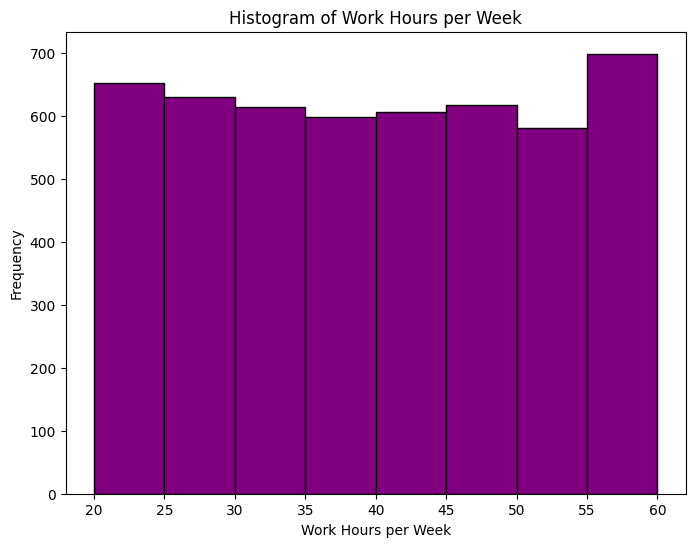

In [20]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Hours_Worked_Per_Week'], bins=8, color='purple', edgecolor='black')
plt.xlabel('Work Hours per Week')
plt.ylabel('Frequency')
plt.title('Histogram of Work Hours per Week')
plt.show()
# The distribution indicates that there is a decreasing pattern across number
# of hours worked, with the exception of the slight increase at 45-50 hours and
# a large increase with the category with the most people is 55-60 hours.

Answer: The distribution indicates that there is a decreasing pattern across number of hours worked, with the exception of the slight increase at 45-50 hours and a large increase with the category with the most people is 55-60 hours.

## 10. Scatter Plot of Work Hours vs. Years of Experience (4 marks)
- Instructions: Create a scatter plot with `work_hours_per_week` on the x-axis and `Years_of_Experience` on the y-axis.

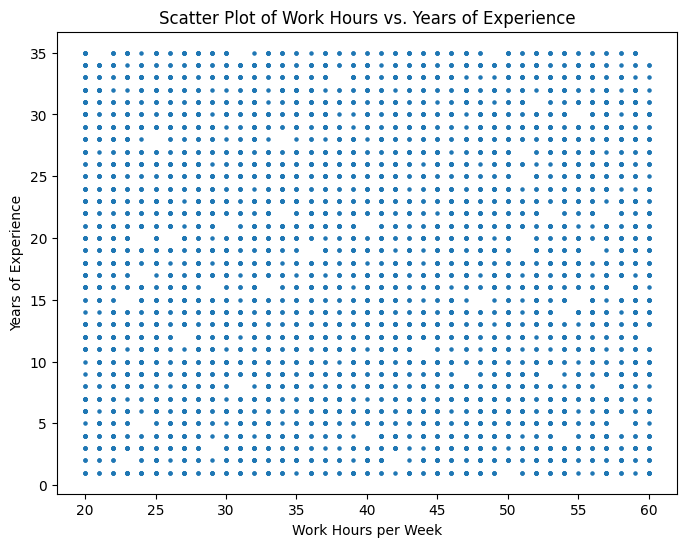

In [21]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Hours_Worked_Per_Week'], df['Years_of_Experience'], s=5)
plt.xlabel('Work Hours per Week')
plt.ylabel('Years of Experience')
plt.title('Scatter Plot of Work Hours vs. Years of Experience')
plt.show()

## 11. Bar Chart of Average Work Life Balance by Job Role (5 marks)
- Instructions: Create a bar chart showing the average `Work_Life_Balance_Rating` for each job_role (4 marks).
- Question: Which job roles have the highest and lowest average work life balance? (1 mark)

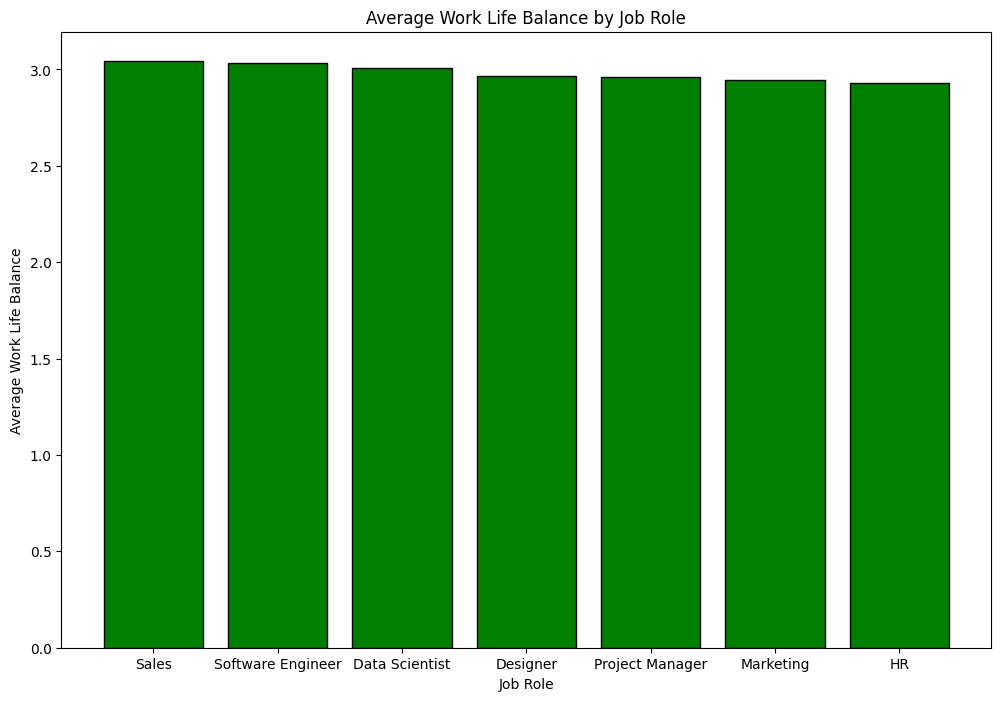

The job role with the highest average Work life balance is Sales
The job role with the lowest average Work life balance is HR


In [22]:
work_life_balance_group = work_life_balance_group.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
plt.bar(work_life_balance_group.index, work_life_balance_group.values, color='green', edgecolor='black')
plt.title("Average Work Life Balance by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Average Work Life Balance")
plt.show()
print("The job role with the highest average Work life balance is", work_life_balance_group.idxmax())
print("The job role with the lowest average Work life balance is", work_life_balance_group.idxmin())

Answer: Sales has the highest work life balance and HR has the lowest.

## 12. Pie Chart of Workload Level Distribution (5 marks)
- Instructions: Use a pie chart to show the proportion of Access_to_Mental_Health_Resources (Yes and no) in the dataset (4 marks).
- Question: What percentage of employees have access to mental health resources? (1 mark)

Text(0.5, 1.0, 'Pie Chart of Mental Health Resource Access')

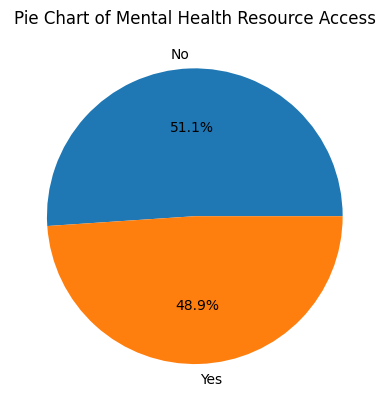

In [23]:
# Pie chart
plt.pie(df['Access_to_Mental_Health_Resources'].value_counts(), labels=df['Access_to_Mental_Health_Resources'].unique(), autopct='%1.1f%%')
plt.title('Pie Chart of Mental Health Resource Access')
# 48.9% of employees have access to mental health resources.

Answer: 48.9% of employees have access to mental health resources.

## 13. Scatter Plot of Years of Experience vs. Social Isolation Rating (6 marks)
Instructions: Create a scatter plot with age on the x-axis and Social_Isolation_Rating on the y-axis (4 marks).
Question: Do you observe any trends or relationships between age and social isolation? Is there a noticeable impact of age on isoloation? (2 marks)

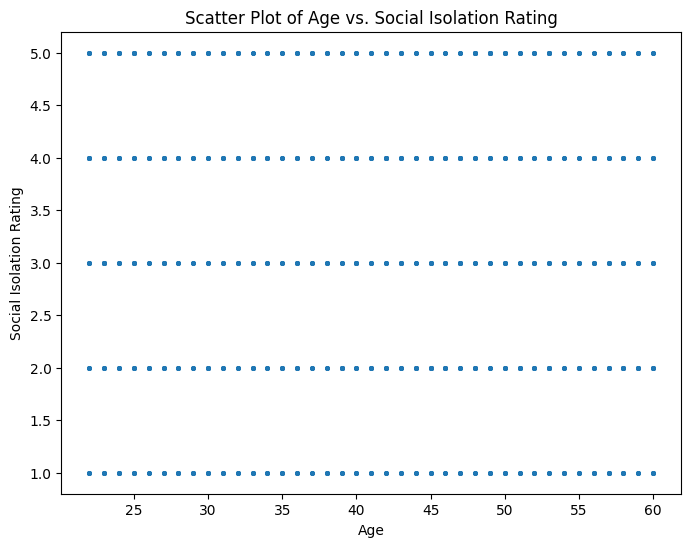

In [24]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Social_Isolation_Rating'], s=5)
plt.xlabel('Age')
plt.ylabel('Social Isolation Rating')
plt.title('Scatter Plot of Age vs. Social Isolation Rating')
plt.show()
# The plot shows no trends or relationships between age and social isolation.

Answer: There is no relationship between age and social isolation in this graph.

# Section 3 - Long Answer/Advanced (20%)



## Job Role and Workload Level Impact on Mental Health

Instructions: Investigate the influence of job roles and workload level on the mental health.

- Create a new column workload_level that labels each entry as "High" if the Hours_Worked_Per_Week is above its mean, otherwise "Low." (5 marks)
- Group the dataset by Industry and calculate the average Hours_Worked_Per_Week for each combination. (5 marks)
- Use a bar chart to display the average Stress_Level for each job role, with separate bars for high and low stress levels. (5 marks)
- Analyze the results: Which job roles and workload levels appear to have the greatest impact on mental health? (5 marks)


In [30]:
# new column
mean_hours = df['Hours_Worked_Per_Week'].mean()
df['Workload_Level'] = df['Hours_Worked_Per_Week'].apply(lambda x: 'High' if x > mean_hours else 'Low')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Workload_Level
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,High
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,High
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,High
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe,Low
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,Low


In [26]:
# new grouping
industry_group = df.groupby('Industry')['Hours_Worked_Per_Week'].mean()
industry_group

,Hours_Worked_Per_Week
Industry,
Consulting,39.205882
Education,39.428986
Finance,39.192771
Healthcare,40.067308
IT,40.017426
Manufacturing,40.241581
Retail,39.150138


<ipython-input-27-bf52b6a7d86e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stress_Level'] = df['Stress_Level'].replace(mapping)


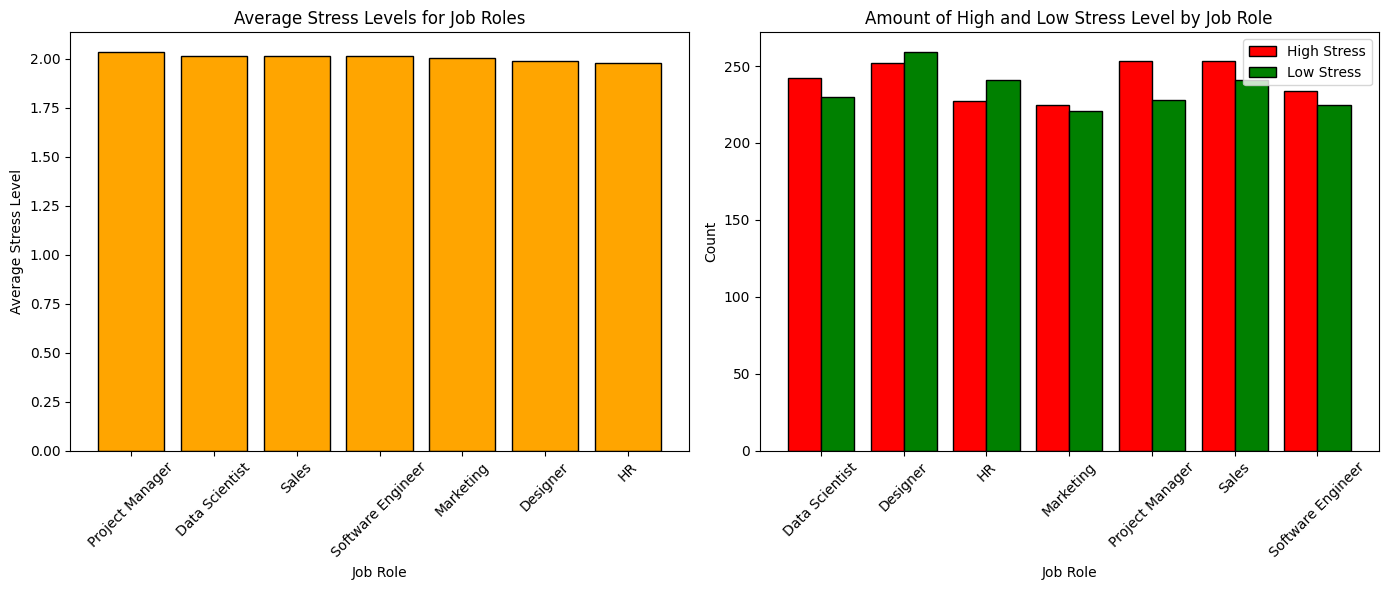

In [27]:
# 1=low, 2=medium, 3=high
mapping = {'High': 3, 'Medium': 2, 'Low': 1}
df['Stress_Level'] = df['Stress_Level'].replace(mapping)

# aggregating data
avg_stress = df.groupby('Job_Role')['Stress_Level'].mean().sort_values(ascending=False)
high_stress_counts = df[df['Stress_Level'] == 3].groupby('Job_Role').size()
low_stress_counts = df[df['Stress_Level'] == 1].groupby('Job_Role').size()

plt.figure(figsize=(14, 6))

# average stress levels
plt.subplot(1, 2, 1)
plt.bar(avg_stress.index, avg_stress, color="orange", edgecolor="black")
plt.title("Average Stress Levels for Job Roles")
plt.xlabel("Job Role")
plt.ylabel("Average Stress Level")
plt.xticks(rotation=45)

# high and low stress counts
x = range(len(high_stress_counts))
width = 0.4
plt.subplot(1, 2, 2)
plt.bar([p - width/2 for p in x], high_stress_counts, width, label='High Stress', color='red', edgecolor='black')
plt.bar([p + width/2 for p in x], low_stress_counts, width, label='Low Stress', color='green', edgecolor='black')
plt.title('Amount of High and Low Stress Level by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(x, high_stress_counts.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Analysis:


In [28]:
avg_hours_worked = df['Hours_Worked_Per_Week'].mean()
avg_stress_level = df['Stress_Level'].mean()

print(f"Average Hours Worked: {avg_hours_worked:.3f}")
print(f"Average Stress Level: {avg_stress_level:.3f}")

Average Hours Worked: 39.615
Average Stress Level: 2.008


In [33]:
# bringing job roles averages to a different dataframe
job_role_avg = df.groupby('Job_Role')[['Hours_Worked_Per_Week', 'Stress_Level', 'Work_Life_Balance_Rating']].mean()

# finding difference from overall average, putting a 0 if the job role average is lower than the total average
job_role_avg['Hours_Worked_Diff'] = job_role_avg['Hours_Worked_Per_Week'].apply(lambda x: max(0, x - avg_hours_worked))
job_role_avg['Stress_Level_Diff'] = job_role_avg['Stress_Level'].apply(lambda x: max(0, x - avg_stress_level))

print("Zero values indicate the actual value is below the average and therefore is not relevant for the purpose of determining highest mental health impact.")
job_role_avg[['Hours_Worked_Diff', 'Stress_Level_Diff']]

Zero values indicate the actual value is below the average and therefore is not relevant for the purpose of determining highest mental health impact.


,Hours_Worked_Diff,Stress_Level_Diff
Job_Role,,
Data Scientist,0.000000,0.009041
Designer,0.000000,0.000000
HR,0.046015,0.000000
Marketing,0.120393,0.000000
Project Manager,0.308164,0.025675
Sales,0.246246,0.008171
Software Engineer,0.656849,0.004458


Answer: Project managers, sales, and software engineers seem to face the biggest impact on mental health. These three both have higher than average workloads and stress levels. Inparticular, project managers face the most stress on average, and software engineers have the heaviest workload on average. Being higher than the average for both workload and stress make these job roles most impactful to overall mental health stemming from work.